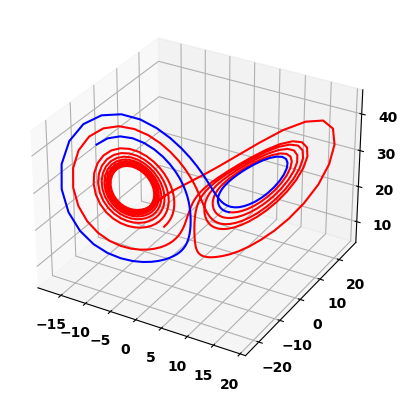

In [17]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

test = pd.read_csv('test-set-10.csv', header = None).to_numpy()
training = pd.read_csv('training-set.csv', header = None).to_numpy()

n, k, res_size = 3, 0.01, 500

w_in = np.random.normal(0, np.sqrt(0.002), size = (res_size, n))
w_res = np.random.normal(0, np.sqrt(2/500), size = (res_size, res_size))
res_train = np.zeros((res_size, training.shape[1]))
res_test = np.zeros((res_size,))

#Training
for i in range(training.shape[1]-1):
    res_train[:,i+1] = np.tanh(np.dot(w_res, res_train[:,i]) + np.dot(w_in, training[:,i]))
res_train = res_train[:,25:]
w_out = np.dot(np.dot(training[:,25:], np.transpose(res_train)), np.linalg.inv(np.dot(res_train, np.transpose(res_train)) + np.multiply(k,np.eye(res_size))))


#Test
for i in range(test.shape[1]-1):
    res_test = np.tanh(np.dot(w_res, res_test) + np.dot(w_in, test[:,i]))
    
o = np.zeros((n, 500))
for i in range(500):
    o[:,i] = np.dot(w_out, res_test)
    res_test = np.tanh(np.dot(w_res, res_test) + np.dot(w_in, o[:,i]))


fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot3D(o[0], o[1], o[2], 'red')
ax.plot3D(test[0], test[1], test[2], 'blue')

np.savetxt("prediction.csv", o[1], delimiter=",", fmt='%s')